In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

downloaded = drive.CreateFile({'id':'1HjJVhAW5ShUhjP_Te_shHfwb1SL9_g3f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202007-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1JrcFOpE8pt_cW3WSRgqcphraBCeB8DHT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202008-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1zu983Np-KB-wr-yY7Eg0kiaiwrtSoeBq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202009-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1-kL0EZFg0sBvQt22H3hnrEYu_zlo9gLy'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202010-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'12LPyXWsaBkfdiz3DRvy0t21dMBOzdbNP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202011-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1K1igSICfeeVjMjORyURLSpFRwHTJSX4U'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202012-capitalbikeshare-tripdata.csv')

downloaded = drive.CreateFile({'id':'1sn8YS229HGrSo_88xXwjtHjeMJJZTm8M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TEMP_USA.csv')

In [ ]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("TEMP_USA.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,38.88481,-77.00609,2015,1,1,0.00,2.62,71.46,101.16,9.12,5.11,-4.02,-4.87,-0.39,3.70
1,38.88481,-77.00609,2015,1,2,0.00,3.16,73.91,101.57,7.84,6.07,-1.76,-2.33,1.79,4.81
2,38.88481,-77.00609,2015,1,3,4.49,4.18,96.42,101.75,5.26,4.38,-0.87,1.35,2.02,1.49
3,38.88481,-77.00609,2015,1,4,10.86,7.35,98.24,100.28,11.12,14.93,3.81,8.88,9.66,6.29
4,38.88481,-77.00609,2015,1,5,0.00,2.34,61.61,101.63,9.17,5.02,-4.14,-6.45,0.15,7.72


In [ ]:
station_status = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/station_status.csv") 
station_status.head()

,data__stations__is_installed,data__stations__num_bikes_disabled,data__stations__is_returning,data__stations__station_status,data__stations__last_reported,data__stations__eightd_has_available_keys,data__stations__legacy_id,data__stations__num_ebikes_available,data__stations__is_renting,data__stations__num_docks_disabled,data__stations__num_docks_available,data__stations__num_bikes_available,data__stations__station_id,last_updated,ttl
0,1,1,1,active,1599426428,False,1,0,1,0,11,3,1,1.599427e+09,5.0
1,1,1,1,active,1599421244,False,2,0,1,0,9,1,2,NaN,NaN
2,1,0,1,active,1599424089,False,3,0,1,0,1,16,3,NaN,NaN
3,1,0,1,active,1599426176,False,4,0,1,0,8,3,4,NaN,NaN
4,1,0,1,active,1599424516,False,5,0,1,0,7,4,5,NaN,NaN


In [ ]:
#imporing capitalbikeshare-tripdata dataset
data1 = pd.read_csv("202008-capitalbikeshare-tripdata.csv") 
data1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,95D0E56BC37512F2,docked_bike,2020-08-26 20:07:36,2020-08-26 20:36:16,Army Navy Dr & S Joyce St,31006.0,N Lynn St & Fairfax Dr,31917.0,38.863700,-77.063300,38.893860,-77.070862,member
1,787142FE24DA497D,docked_bike,2020-08-02 17:54:57,2020-08-02 18:12:36,22nd & P ST NW,31285.0,14th & Upshur St NW,31406.0,38.909394,-77.048728,38.942475,-77.032678,member
2,BE6C2BFB2C0A6CD6,docked_bike,2020-08-11 18:55:15,2020-08-11 19:16:30,Prince George's Plaza Metro,32420.0,Queens Chapel & Hamilton St,32410.0,38.965742,-76.954803,38.954600,-76.959500,casual
3,7EEF58C1346E290C,docked_bike,2020-08-01 13:51:47,2020-08-01 14:09:52,Rhode Island & Connecticut Ave NW,31239.0,11th & Park Rd NW,31651.0,38.905995,-77.039802,38.931322,-77.028247,casual
4,61DE8A9F22D88C38,docked_bike,2020-08-21 19:31:56,2020-08-21 19:49:17,Market Square / King St & Royal St,31042.0,King St & Patrick St,31044.0,38.804718,-77.043363,38.805317,-77.049883,member


In [ ]:
data1['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data1.rideable_type	]
 
data1['rideable_type'].value_counts()

1    201992
0     49611
Name: rideable_type, dtype: int64

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data1[data1.rideable_type == 1]
df_minority = data1[data1.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49611,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data1_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data1_downsampled.rideable_type.value_counts()

1    49611
0    49611
Name: rideable_type, dtype: int64

In [ ]:
data1_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data1_downsampled.rideable_type	]
 
data1_downsampled['rideable_type'].value_counts()

electric_bike    49611
docked_bike      49611
Name: rideable_type, dtype: int64

In [ ]:
#imporing capitalbikeshare-tripdata dataset
data2 = pd.read_csv("202009-capitalbikeshare-tripdata.csv") 
data2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02C8003EE103FB10,docked_bike,2020-09-18 17:28:03,2020-09-18 18:28:31,5th St & Massachusetts Ave NW,31265.0,5th St & Massachusetts Ave NW,31265.0,38.90093,-77.018677,38.90093,-77.018677,casual
1,B3CCC49A34A718DC,electric_bike,2020-09-29 18:41:26,2020-09-29 19:05:59,NaN,NaN,NaN,NaN,38.90000,-77.050000,38.90000,-76.980000,casual
2,8F6A634D2E73B432,electric_bike,2020-09-29 07:47:38,2020-09-29 08:01:04,NaN,NaN,NaN,NaN,38.90000,-76.980000,38.90000,-77.000000,casual
3,BCF6943D9FD02C9B,electric_bike,2020-09-29 19:50:38,2020-09-29 20:08:08,NaN,NaN,NaN,NaN,38.91000,-77.030000,38.90000,-77.000000,casual
4,D91499AB0FB94DCF,electric_bike,2020-09-28 20:36:51,2020-09-28 21:01:34,NaN,NaN,NaN,NaN,38.92000,-77.030000,38.90000,-77.000000,casual


In [ ]:
data2['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data2.rideable_type	]
 
data2['rideable_type'].value_counts()

1    194225
0     55674
Name: rideable_type, dtype: int64

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data2[data2.rideable_type == 1]
df_minority = data2[data2.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=55674,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data2_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data2_downsampled.rideable_type.value_counts()

1    55674
0    55674
Name: rideable_type, dtype: int64

In [ ]:
data2_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data2_downsampled.rideable_type	]
 
data2_downsampled['rideable_type'].value_counts()

electric_bike    55674
docked_bike      55674
Name: rideable_type, dtype: int64

In [ ]:
#imporing capitalbikeshare-tripdata dataset
data3 = pd.read_csv("202010-capitalbikeshare-tripdata.csv") 
data3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5160990A29898496,electric_bike,2020-10-12 07:38:42,2020-10-12 07:52:38,NaN,NaN,NaN,NaN,38.81,-77.06,38.84000,-77.060000,casual
1,AB3EDB59F4D802E7,electric_bike,2020-10-02 17:58:30,2020-10-02 18:07:45,NaN,NaN,NaN,NaN,38.93,-77.00,38.91000,-77.000000,casual
2,238A92D9D011475D,electric_bike,2020-10-02 00:13:37,2020-10-02 00:21:10,NaN,NaN,NaN,NaN,38.91,-77.04,38.90000,-77.000000,casual
3,59D6EF767F57C139,electric_bike,2020-10-02 16:31:12,2020-10-02 16:42:50,NaN,NaN,NaN,NaN,38.92,-77.03,38.91000,-77.000000,casual
4,A94B93E9E864972A,electric_bike,2020-10-19 21:33:46,2020-10-19 21:43:55,NaN,NaN,14th & V St NW,31101.0,38.91,-77.04,38.91769,-77.031821,casual


In [ ]:
data3['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data3.rideable_type	]
 
data3['rideable_type'].value_counts()

1    180231
0     49601
Name: rideable_type, dtype: int64

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data3[data3.rideable_type == 1]
df_minority = data3[data3.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49601,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data3_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data3_downsampled.rideable_type.value_counts()

1    49601
0    49601
Name: rideable_type, dtype: int64

In [ ]:
data3_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data3_downsampled.rideable_type	]
 
data3_downsampled['rideable_type'].value_counts()

electric_bike    49601
docked_bike      49601
Name: rideable_type, dtype: int64

In [ ]:
data4 = pd.read_csv("202007-capitalbikeshare-tripdata.csv") 
data4.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual
2,FBE8E99BAAED0455,electric_bike,2020-07-22 09:47:52,2020-07-22 09:53:38,NaN,NaN,NaN,NaN,38.920000,-77.000000,38.92000,-77.010000,casual
3,E7950C376FD263E4,electric_bike,2020-07-22 10:36:55,2020-07-22 10:49:03,NaN,NaN,NaN,NaN,38.920000,-77.010000,38.92000,-77.000000,casual
4,0149F273572ED43F,electric_bike,2020-07-22 15:53:55,2020-07-22 15:58:47,NaN,NaN,NaN,NaN,38.910000,-77.050000,38.90000,-77.050000,casual


In [ ]:
data4['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data4.rideable_type	]
 
data4['rideable_type'].value_counts()

1    212516
0     15786
Name: rideable_type, dtype: int64

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data4[data4.rideable_type == 1]
df_minority = data4[data4.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15786,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data4_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data4_downsampled.rideable_type.value_counts()

1    15786
0    15786
Name: rideable_type, dtype: int64

In [ ]:
data4_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data4_downsampled.rideable_type	]
 
data4_downsampled['rideable_type'].value_counts()

docked_bike      15786
electric_bike    15786
Name: rideable_type, dtype: int64

In [ ]:
data5 = pd.read_csv("202011-capitalbikeshare-tripdata.csv") 
data5.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EAF58AB55323A15E,docked_bike,2020-11-02 18:41:34,2020-11-02 18:49:04,17th & K St NW / Farragut Square,31233.0,15th & P St NW,31201.0,38.902061,-77.038322,38.909868,-77.034421,casual
1,DBD5BC10E1F0C019,docked_bike,2020-11-07 17:24:13,2020-11-07 17:24:48,New Jersey Ave & F St NW,31655.0,New Jersey Ave & F St NW,31655.0,38.897108,-77.011616,38.897108,-77.011616,member
2,64776A208DCED86D,docked_bike,2020-11-20 13:28:22,2020-11-20 14:19:26,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049437,38.892244,-77.033234,casual
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual
4,98DEA3EA1A85634F,docked_bike,2020-11-21 10:55:34,2020-11-21 11:12:45,Metro Center / 12th & G St NW,31230.0,2nd & G St NE,31639.0,38.898364,-77.027869,38.899670,-77.003666,casual


In [ ]:
data5['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data5.rideable_type	]
 
data5['rideable_type'].value_counts()

1    135343
0     40092
Name: rideable_type, dtype: int64

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data5[data5.rideable_type == 1]
df_minority = data5[data5.rideable_type==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=40092,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data5_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data5_downsampled.rideable_type.value_counts()

1    40092
0    40092
Name: rideable_type, dtype: int64

In [ ]:
data5_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data5_downsampled.rideable_type	]
 
data5_downsampled['rideable_type'].value_counts()

docked_bike      40092
electric_bike    40092
Name: rideable_type, dtype: int64

In [ ]:
data6 = pd.read_csv("202012-capitalbikeshare-tripdata.csv") 
data6.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
3,565C5C331ABAD77B,classic_bike,2020-12-29 13:50:51,2020-12-29 14:12:22,Wakefield High School,31054.0,S Glebe Rd & Potomac Ave,31010.0,38.847129,-77.112550,38.842600,-77.050200,member
4,7576B3F4B4D6ADFF,classic_bike,2020-12-27 12:30:28,2020-12-27 12:36:12,Washington-Liberty High School / N Stafford St...,31920.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.888282,-77.111066,38.882788,-77.103148,member


In [ ]:
data6['rideable_type'] = [1 if b=='docked_bike' else 0 for b in data6.rideable_type	]
 
data6['rideable_type'].value_counts()

0    76905
1    28924
Name: rideable_type, dtype: int64

In [ ]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = data6[data6.rideable_type == 0]
df_minority = data6[data6.rideable_type==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=28924,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
data6_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
data6_downsampled.rideable_type.value_counts()

1    28924
0    28924
Name: rideable_type, dtype: int64

In [ ]:
data6_downsampled['rideable_type'] = ['docked_bike' if b== 1 else 'electric_bike' for b in data6_downsampled.rideable_type	]
 
data6_downsampled['rideable_type'].value_counts()

docked_bike      28924
electric_bike    28924
Name: rideable_type, dtype: int64

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [ ]:
data = pd.concat([data1_downsampled, data2_downsampled, data3_downsampled, data4_downsampled, data5_downsampled, data6_downsampled], ignore_index=True)
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual


In [ ]:
 #attributes in capitalbikeshare-tripdata dataset
 dt_column = data.columns
 print('Primary Fields in the Bike-Sharing Dataset')
 print(dt_column)

Primary Fields in the Bike-Sharing Dataset
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [ ]:
#information for Bike-sharing dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479376 entries, 0 to 479375
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             479376 non-null  object 
 1   rideable_type       479376 non-null  object 
 2   started_at          479376 non-null  object 
 3   ended_at            479376 non-null  object 
 4   start_station_name  401686 non-null  object 
 5   start_station_id    401686 non-null  float64
 6   end_station_name    394701 non-null  object 
 7   end_station_id      394701 non-null  float64
 8   start_lat           479376 non-null  float64
 9   start_lng           479376 non-null  float64
 10  end_lat             478235 non-null  float64
 11  end_lng             478235 non-null  float64
 12  member_casual       479376 non-null  object 
dtypes: float64(6), object(7)
memory usage: 47.5+ MB
None


In [ ]:
#types of ride available
ride_able_no = data['rideable_type'].unique()
print(ride_able_no)
print(len(ride_able_no))

['docked_bike' 'electric_bike']
2


In [ ]:
#different start in dataset
start_station_name_no = data['start_station_name'].unique()
print(start_station_name_no)
print('no. of start stations-')
print(len(start_station_name_no))

["10th St & L'Enfant Plaza SW" 'Constitution Ave & 2nd St NW/DOL'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir'
 'John McCormack Rd NE' '16th & Irving St NW'
 'California St & Florida Ave NW' '10th & E St NW' '14th & Newton St NW'
 '14th & Rhode Island Ave NW' 'Roosevelt Island' '10th & Monroe St NE'
 'Lincoln Park / 13th & East Capitol St NE '
 'Woodglen Dr & Executive Blvd' '18th & R St NW' 'D St & Maryland Ave NE'
 '34th & Water St NW' '24th & N St NW' '14th & Q St NW' 'Gravelly Point'
 'Metro Center / 12th & G St NW' '17th St & Massachusetts Ave NW'
 'Pershing Dr & N George Mason Dr' 'New Hampshire Ave & Ward Pl NW'
 '6th St & Indiana Ave NW' '14th & R St NW' 'Adams Mill & Columbia Rd NW'
 '11th & Kenyon St NW' '7th & K St NW' 'Columbus Circle / Union Station'
 '1st & Washington Hospital Center NW' 'Tanger Outlets'
 'King St Metro North / Cameron St' 'Lincoln Memorial'
 '34th St & Wisconsin Ave NW'
 'Ohio Dr & West Basin Dr SW / MLK & FDR Memorials' '15th & W St NW'
 '14t

In [ ]:
# different start station ID 
start_station_id_no = data['start_station_id'].unique()
print(start_station_id_no)
print('no. of start stations id-')
print(len(start_station_id_no))

[31287. 31271. 32014. ... 31938. 31940. 31936.]
no. of start stations id-
1207


In [ ]:
#type of member in dataset 
member_casual_no = data['member_casual'].unique()
print(member_casual_no)
print('no. of member_casual-')
print(len(member_casual_no))

['casual' 'member']
no. of member_casual-
2


In [ ]:
#different between start ride and end ride to calculate travel time
difference_in_ride = ( pd.to_datetime(data['ended_at']) -  pd.to_datetime(data['started_at'])) 
print(difference_in_ride[1].seconds)
print(difference_in_ride)

287
0        0 days 00:20:23
1        0 days 00:04:47
2        0 days 00:38:58
3        0 days 00:13:53
4        0 days 00:08:33
               ...      
479371   0 days 00:46:06
479372   0 days 00:27:07
479373   0 days 00:22:45
479374   0 days 00:35:59
479375   0 days 00:40:58
Length: 479376, dtype: timedelta64[ns]


In [ ]:
# dropped the null values
data.dropna(subset = ["start_station_name","end_station_name"], inplace=False)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479371,8A0B3B755E6F7EF0,docked_bike,2020-12-04 11:56:13,2020-12-04 12:42:19,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479372,A10ED3D50E5AB612,docked_bike,2020-12-12 13:49:55,2020-12-12 14:17:02,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888553,-77.032427,38.892300,-77.043600,casual
479373,F146CC9669ABF5EC,docked_bike,2020-12-03 13:43:26,2020-12-03 14:06:11,Jefferson Dr & 14th St SW,31247.0,4th St & Madison Dr NW,31288.0,38.888553,-77.032427,38.890496,-77.017247,casual
479374,614005BC98FE93F7,docked_bike,2020-12-06 07:27:47,2020-12-06 08:03:46,Jefferson Dr & 14th St SW,31247.0,19th St & Constitution Ave NW,31235.0,38.888552,-77.032427,38.892300,-77.043600,casual


In [ ]:
data['rideable_type'].value_counts()

docked_bike      239688
electric_bike    239688
Name: rideable_type, dtype: int64

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 52500, 53000, 53500, 54000, 54500, 55000, 55500, 56000, 56500, 57000, 57500, 58000, 58500, 59000, 59500, 60000, 60500, 61000, 61500, 62000, 62500, 63000, 63500, 64000, 64500, 65000, 65500, 66000, 66500, 67000, 67500, 68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 7

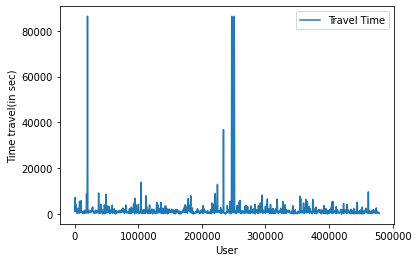

In [ ]:
# plotting different travel time of different user
x = []
for i in range(len(difference_in_ride)):
  x.append(difference_in_ride[i].seconds)
for i in range(len(difference_in_ride)):
  difference_in_ride[i]=x[i]

y = [i for i in range(0,len(difference_in_ride),500)]
j=0
k = []
for i in range(0,len(difference_in_ride),500):
  if j < len(difference_in_ride):
    k.append(x[j]) 
    j = j+500
print(y)
print(k)

plt.plot(y, k, label='Travel Time')
plt.xlabel('User') 
plt.ylabel('Time travel(in sec)') 
plt.legend()
plt.show()

In [ ]:
data['time_to_travel'] = difference_in_ride
data.head();

In [ ]:
data9 = data[data['time_to_travel'] >= 120]
data9.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,2020-08-22 17:30:02,10th St & L'Enfant Plaza SW,31287.0,13th & E St SE,31607.0,38.884323,-77.026010,38.882915,-76.987907,casual,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,2020-08-26 13:18:41,Constitution Ave & 2nd St NW/DOL,31271.0,New Jersey Ave & F St NW,31655.0,38.892275,-77.013917,38.897108,-77.011616,casual,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,2020-08-07 17:13:39,Friendship Hts Metro / Wisconsin Ave & Wiscons...,32014.0,22nd & P ST NW,31285.0,38.961763,-77.085998,38.909394,-77.048728,casual,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,2020-08-07 20:45:58,John McCormack Rd NE,31528.0,3rd & M St NE,31627.0,38.938889,-76.997226,38.905470,-77.002130,casual,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,2020-08-18 13:49:07,16th & Irving St NW,31122.0,New Hampshire Ave & T St NW,31229.0,38.928893,-77.036250,38.915544,-77.038252,member,513


In [ ]:
data9['rideable_type'].value_counts()

docked_bike      234141
electric_bike    231737
Name: rideable_type, dtype: int64

In [ ]:
import calendar
v = pd.Series([i for i in range(len(data1))])
data9 = data9.reindex(v)
s = pd.to_datetime(data9['started_at'])

print(s)
print(s[0].month)
print(s[0].year)
print(s[0].day)
print(s[1].weekday())
print(calendar.day_name[s[1].weekday()])
m1 = []
m2 = []
m3 = []
m4 = []
v=0
for k in range(len(s)):
  m1.append(s[k].month)
for k in range(len(s)):
  m2.append(s[k].year)
for k in range(len(s)):
  m3.append(s[k].day)

#for k in range(len(s)):
 # if s[k] is not None:
  #  m4.append(calendar.day_name[s[k].weekday()])
  #else :
   # m4.append([s[0].weekday()])


0        2020-08-22 17:09:39
1        2020-08-26 13:13:54
2        2020-08-07 16:34:41
3        2020-08-07 20:32:05
4        2020-08-18 13:40:34
                 ...        
251598   2020-10-27 13:53:17
251599   2020-10-30 16:47:03
251600   2020-10-03 12:56:26
251601   2020-10-23 11:37:46
251602   2020-10-31 14:13:29
Name: started_at, Length: 251603, dtype: datetime64[ns]
8
2020
22
2
Wednesday


In [ ]:
import pandas as pd

cars = {'started_at': data9['started_at'],
        'DY':m3,
        'MO' : m1,
        'YEAR' : m2,
        }

date_ds = pd.DataFrame(cars, columns = ['started_at','DY','MO','YEAR'])

print (date_ds)

                 started_at    DY    MO    YEAR
0       2020-08-22 17:09:39  22.0   8.0  2020.0
1       2020-08-26 13:13:54  26.0   8.0  2020.0
2       2020-08-07 16:34:41   7.0   8.0  2020.0
3       2020-08-07 20:32:05   7.0   8.0  2020.0
4       2020-08-18 13:40:34  18.0   8.0  2020.0
...                     ...   ...   ...     ...
251598  2020-10-27 13:53:17  27.0  10.0  2020.0
251599  2020-10-30 16:47:03  30.0  10.0  2020.0
251600  2020-10-03 12:56:26   3.0  10.0  2020.0
251601  2020-10-23 11:37:46  23.0  10.0  2020.0
251602  2020-10-31 14:13:29  31.0  10.0  2020.0

[251603 rows x 4 columns]


In [ ]:
dc = {'ride_id': data9['ride_id'], 'rideable_type': data9['rideable_type'], 'started_at': data9['started_at'], 'start_station_id': data9['start_station_id'], 'time_to_travel': data9['time_to_travel'] } 
df = pd.DataFrame(dc)
df 

,ride_id,rideable_type,started_at,start_station_id,time_to_travel
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513
...,...,...,...,...,...
251598,AA052EB2F6361DDB,docked_bike,2020-10-27 13:53:17,31506.0,478
251599,C0F6AFB0F23029D0,docked_bike,2020-10-30 16:47:03,31288.0,2667
251600,2CAF1626BA51A5EC,docked_bike,2020-10-03 12:56:26,31602.0,86395
251601,C7527C57BBBB2C5B,docked_bike,2020-10-23 11:37:46,31238.0,86347


In [ ]:
df = pd.merge( df,date_ds, how='left', on=['started_at'])
df

,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223,22.0,8.0,2020.0
1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287,26.0,8.0,2020.0
2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338,7.0,8.0,2020.0
3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833,7.0,8.0,2020.0
4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513,18.0,8.0,2020.0
...,...,...,...,...,...,...,...,...
44895202,AA052EB2F6361DDB,docked_bike,2020-10-27 13:53:17,31506.0,478,27.0,10.0,2020.0
44895203,C0F6AFB0F23029D0,docked_bike,2020-10-30 16:47:03,31288.0,2667,30.0,10.0,2020.0
44895204,2CAF1626BA51A5EC,docked_bike,2020-10-03 12:56:26,31602.0,86395,3.0,10.0,2020.0
44895205,C7527C57BBBB2C5B,docked_bike,2020-10-23 11:37:46,31238.0,86347,23.0,10.0,2020.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.to_csv('/content/drive/MyDrive/tv.csv')